In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib notebook
from scipy import *
from tqdm.notebook import *
import sys
import seaborn as sns
sns.set_theme(style="whitegrid")
import time
from numba import jit
from numpy import imag
from scipy import signal


# Uncomment the n5re.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

# Simulation of the Brownian Motion

### Parameters:

In [2]:
### Beam parameters
w = 100.  # waist

#### system parameters
k = np.array([1.,0.3,.5])*10.

gama = 100.
diff = 10.

# particle param.:
m = .1
# simulation parameters
N = 20
T = 2**20
dimensions = 3
print("Simulation time =", T)

delta_t = 0.001

time_axis = np.arange(0, T*delta_t, delta_t)

k_b = 1.32 * 10**(-23)

tot = gama/k
print("Optical trap characteristic time =", np.max(tot))
print("Time interval =", delta_t)
tp = m/gama
print("Momentum relaxation time =", tp)

Simulation time = 1048576
Optical trap characteristic time = 33.333333333333336
Time interval = 0.001
Momentum relaxation time = 0.001


### Simulate:

In [3]:
# RK4
sys.path.append("Simulation/RK4")
import brownian_motion_sim as sim

theta = 0.*np.pi/180

start = time.time()
data = sim.main(k, gama, diff, m, N, T, delta_t, w, dimensions, theta=theta)  # run rk4 integrator
stop = time.time()
print(stop-start)

43.324371337890625


# Potential field:

<ipython-input-4-f08782015e20>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F = F + [-1.*k[axis]*r[axis] for axis in range(3)]


<IPython.core.display.Javascript object>


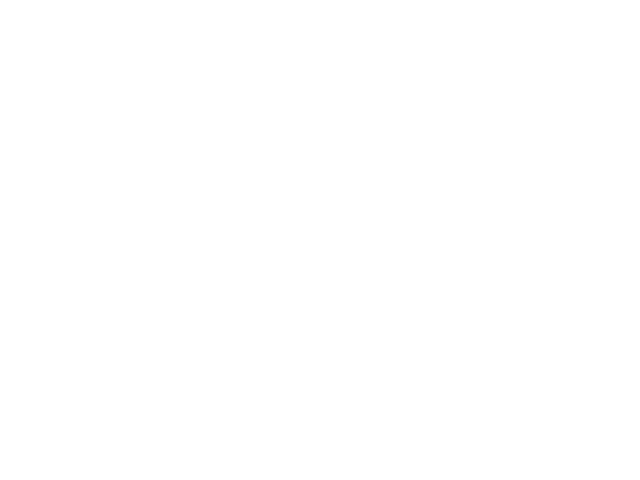

Text(0.5, 1.0, 'Potential Shape and Force')

In [4]:
x = np.arange(-3,3,0.1) 
y = np.arange(-3,3,0.1)
xx,yy = np.meshgrid(x,y)

def force(r, k):
    F = np.array([0.,0.,0.])
    F = F + [-1.*k[axis]*r[axis] for axis in range(3)]
    return F

Fx,Fy,Fz = force([xx,yy,0.], k)
V = (Fx**2)/(2*k[0]) + (Fy**2)/(2*k[1]) + (Fz**2)/(2*k[2])

subplots()
imshow(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)],origin='lower',alpha=0.4)
CS = contour(V,extent=[np.min(x),np.max(x),np.min(y),np.max(y)])
clabel(CS, CS.levels, inline=True, fontsize=10)
streamplot(xx,yy,Fx,Fy, density=[1, 1],color='k', linewidth=0.3)
title('Potential Shape and Force')

### Plotting:

<IPython.core.display.Javascript object>


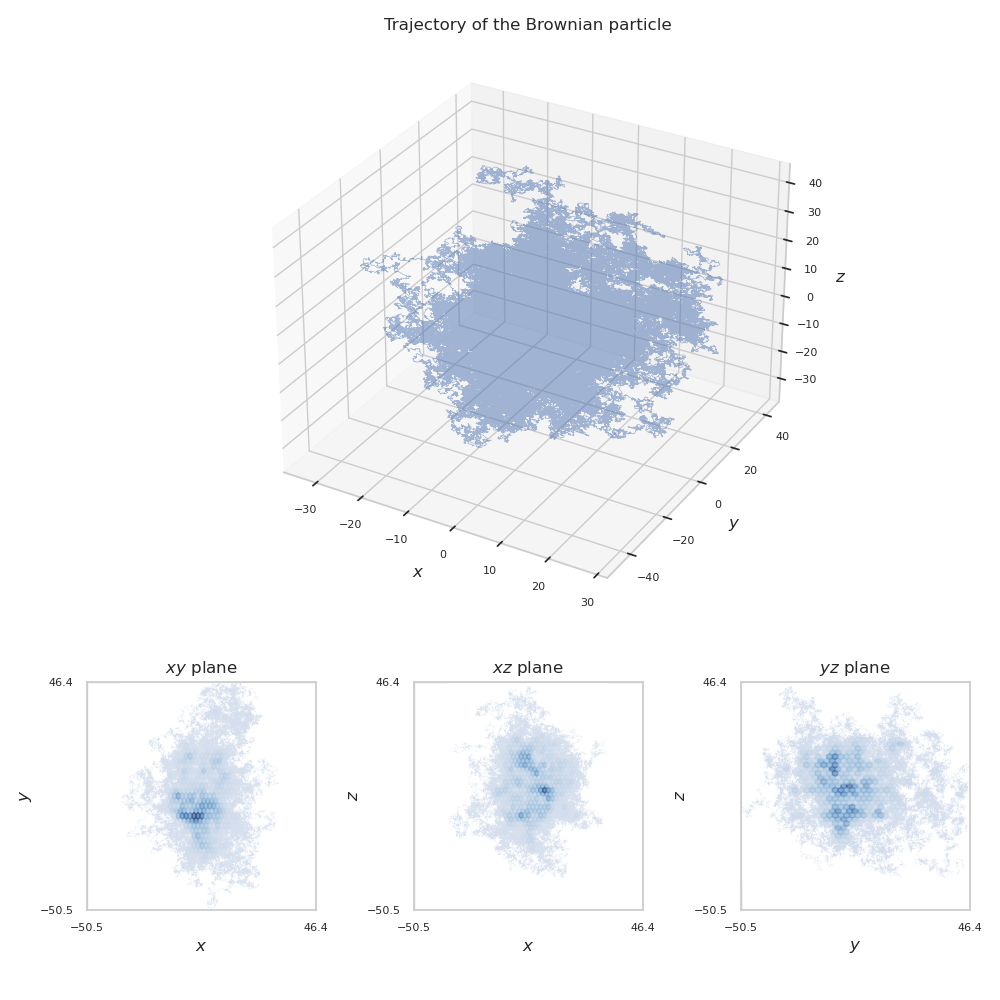

(-36.91158978317568, 44.80462636374857)

In [5]:
from scipy.stats import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib notebook

###########################################################################
#ignore this, just to define a colormap that goes to transparent for hexbin
cmap = cm.Blues
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)
###########################################################################4

#####Plots#################################################################
fig = figure(figsize=(10,10))
    
gs = fig.add_gridspec(2,3,height_ratios = [2,1], width_ratios= [1,1,1])
    
rcParams.update({'font.size': 12})
rc('xtick', labelsize=8) 
rc('ytick', labelsize=8) 
    


fig.set_tight_layout(True)

plot_step = 5
x_d = data[0,:,0]
y_d = data[0,:,1]
z_d = data[0,:,2]

xmin, xmax = np.min(x_d),np.max(x_d)
ymin, ymax = np.min(y_d),np.max(y_d)
zmin, zmax = np.min(z_d),np.max(z_d)

########xy plane##############

ax = fig.add_subplot(gs[1,0])
ax.hexbin(x_d,y_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(x_d,y_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title(r"$xy$ plane")
ax.set_aspect('equal')


########xz plane##############
ax = fig.add_subplot(gs[1,1])
ax.hexbin(x_d,z_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(x_d,z_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$z$')
ax.set_title(r"$xz$ plane")
ax.set_aspect('equal')

########yz plane##############
ax = fig.add_subplot(gs[1,2])
ax.hexbin(y_d,z_d, cmap=my_cmap, gridsize=40,alpha=0.5)
#contourf(np.transpose(f), cmap = 'Blues', aspect='auto', extent = [xmin,xmax,ymin,ymax],alpha=1.,origin='lower')
ax.plot(y_d,z_d, alpha=0.2, color='b', lw=0.1)

range_min = min([xmin,ymin,zmin])
range_max = max([xmax,ymax,zmax])
ax.set_xlim([range_min,range_max])
ax.set_ylim([range_min,range_max])
ax.set_xticks([np.round(range_min,1),np.round(range_max,1)])
ax.set_yticks([np.round(range_min,1),np.round(range_max,1)])

ax.set_xlabel(r'$y$')
ax.set_ylabel(r'$z$')
ax.set_title(r"$yz$ plane")
ax.set_aspect('equal')
        

##########3d Plot###############
ax = ax = fig.add_subplot(gs[0,:],projection='3d')
line = plot(x_d,y_d,z_d, lw=0.5, c='b',alpha=0.5) # For line plot
step=10

 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('Trajectory of the Brownian particle')
ax.set_xlim((xmin,xmax))
ax.set_ylim((ymin,ymax))
ax.set_zlim((zmin,zmax))

#ax.set_xticks([np.round(xmin,1),np.round(xmax,1)])
#ax.set_yticks([np.round(ymin,1),np.round(ymax,1)])
#ax.set_zticks([np.round(zmin,1),np.round(zmax,1)])





### Signals Obtained:

<IPython.core.display.Javascript object>


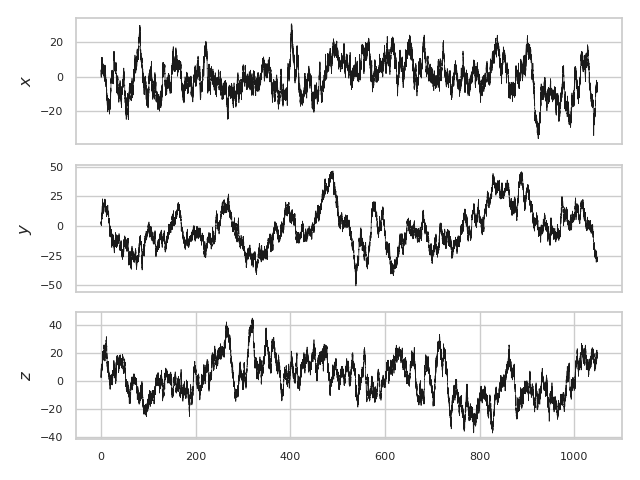

In [6]:
#Plots of the signals [x(t),y(t),z(t)]
subplots()
subplot(311)
ax=gca()
ax.plot(time_axis, x_d, color = 'k', lw =0.5)
ax.set_xticks([])
ax.set_ylabel(r'$x$')
subplot(312)
ax=gca()
ax.plot(time_axis, y_d, color = 'k', lw =0.5)
ax.set_xticks([])
ax.set_ylabel(r'$y$')
subplot(313)
ax=gca()
ax.plot(time_axis, z_d , color = 'k', lw =0.5)
ax.set_ylabel(r'$z$')
tight_layout()

### 1. Stiffness computation using standard deviation

In [7]:
sys.path.append("Calibration/std_dev")  # add folder with calibration scripts

import std_dev as sd  # import the potential analysis script

k_estimate, k_var, x_eq = sd.main(data, gama, diff)

print(k_estimate , r'$\pm$', np.sqrt(k_var))
print(x_eq)

[9.99996277 3.48024078 5.3576181 ] $\pm$ [1.39626762 0.90183355 0.9671184 ]
[ 0.24434627 -0.49550303  0.45639088]


# 2. Stiffness computation using Power Spectral Density

[11.30127244  0.0170204 ]
[1.64847068e+01 7.77742853e-03]
[1.40877277e+01 1.12059198e-02]
D = 11.301272436092086 , err = 0.0
fc = 0.017020403016680518 , err = 0.0


<IPython.core.display.Javascript object>


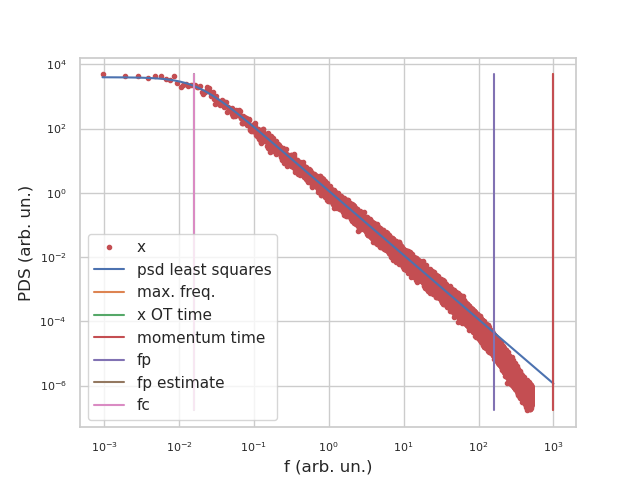

159.15494309189535
fc = [0.01591549 0.00477465 0.00795775]


'\n# y axis\naxs2.plot(freqs, psd[:,1], ".", label="y", color="g")\naxs2.plot(hor, Lorentzian(hor, m, fc[1], diff, gama), label="psd theoretical")\naxs2.plot(np.full(2,1/delta_t), np.array([np.min(psd[:,1]),np.max(psd[:,1])]),label="max. freq.")\naxs2.plot(np.full(2,k[1]/gama), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label="y OT time")\naxs2.plot(np.full(2,gama/m), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label = "momentum time")\n#axs2.plot(np.full(2,fc[1]), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label = "fc")\naxs2.set_xscale("log")\naxs2.set_yscale("log")\naxs2.legend()\n\n# z axis\naxs3.plot(freqs, psd[:,2], ".", label="z", color="b")\naxs3.plot(hor, Lorentzian(hor, m, fc[2], diff, gama), label="psd theoretical")\naxs3.plot(np.full(2,1/delta_t), np.array([np.min(psd[:,2]),np.max(psd[:,2])]),label="max. freq.")\naxs3.plot(np.full(2,k[2]/gama), np.array([np.min(psd[:,2]),np.max(psd[:,2])]), label="z OT time")\naxs3.plot(np.full(2,gama/m), np.array([np.min(psd[:,2

In [8]:
import scipy as sp
from scipy.optimize import curve_fit

Temp = gama*diff

#def Lorentzian(f, m, k, gamma):
#    return Temp/(gama*np.pi**2 *(f**2 + (2*np.pi*m*f**2 /gamma + k/(2*np.pi*gamma))**2))

sys.path.append("Calibration/Power Spectral Density")
import PSD as PSD

nperseg = T

fc = k/(2*np.pi*gama)

maxfev = 10**20

psd, freqs, p, p_cov, fp_est = PSD.main(data, delta_t, nperseg, dimensions, gama*diff, maxfev, mean=True)

print("D =", p[0, 0], ", err =", p_cov[0,0])
print("fc =", p[1, 0], ", err =", p_cov[1,0])
#print("D(x) =", p[2, 0], ", err =", p_cov[2,0])
#print("m(z) =", p[3, 0], ", err =", p_cov[3,0])
#print("gamma(x) =", p[3, 0], ", err =", p_cov[3,0])
#print("offset(x) =", p[4, 0], ", err =", p_cov[4,0])

#print("m(y) =", p[0, 1], ", err =", p_cov[0,1])
#print("k(y) =", p[1, 1], ", err =", p_cov[1,1])
#print("gamma(y) =", p[2, 1], ", err =", p_cov[2,1])
#print("D(z) =", p[3, 1], ", err =", p_cov[3,1])
#print("gamma(y) =", p[3, 1], ", err =", p_cov[3,1])
#print("offset(y) =", p[4, 1], ", err =", p_cov[4,1])

#print("m(z) =", p[0, 2], ", err =", p_cov[0,2])
#print("k(z) =", p[1, 2], ", err =", p_cov[1,2])
#print("gamma(z) =", p[2, 2], ", err =", p_cov[2,2])
#print("D(z) =", p[3, 2], ", err =", p_cov[3,2])
#print("gamma(z) =", p[3, 2], ", err =", p_cov[3,2])
#print("offset(z) =", p[4, 2], ", err =", p_cov[4,2])

#fig2, (axs1, axs2, axs3) = subplots(3, figsize=(10,15))
fig2, axs1 = subplots(1)


hor = np.geomspace(np.min(freqs[1::]), 1/delta_t, num=100)

fp = gama/(2*np.pi*m)

print(fp)
print("fc =", fc)

def Lorentzian_fp(f, D, fp):
    return D* fp**2 /(np.pi**2 *(f**4 + fp**2 *f**2))

def Lorentzian(f, k, gamma, D, m):
    return gamma**2 * D/(np.pi**2 * ((2*np.pi*m)**2 * (-f**2 + k/((2*np.pi)**2 *m))**2 + gamma**2 *f**2))

def Lorentzian(f, D, fc):
    return D / ((np.pi**2)* (fc**2 + f**2))

# x axis
axs1.plot(freqs, psd[:,0], ".", label="x", color="r")
axs1.plot(hor, Lorentzian(hor, p[0,0], p[1,0]), label="psd least squares")
#axs1.plot(hor, Lorentzian(hor, k[0], gama, diff, m), label="psd theoretical")
#axs1.plot(hor, Lorentzian_fp(hor, fp_est[0,0], fp_est[1,0]), label="psd theoretical fp")
axs1.plot(np.full(2,1/delta_t), np.array([np.min(psd[:,0]),np.max(psd[:,0])]),label="max. freq.")
axs1.plot(np.full(2,1/(2*np.pi*tot[0])), np.array([np.min(psd[:,0]),np.max(psd[:,0])]), label="x OT time")
axs1.plot(np.full(2,1/tp), np.array([np.min(psd[:,0]),np.max(psd[:,0])]), label = "momentum time")
axs1.plot(np.full(2,(2*np.pi*m/gama)**(-1)), np.array([np.min(psd[:,0]),np.max(psd[:,0])]), label = "fp")
axs1.plot(np.full(2,fp_est[1,0]), np.array([np.min(psd[:,0]),np.max(psd[:,0])]), label = "fp estimate")
axs1.plot(np.full(2,fc[0]), np.array([np.min(psd[:,0]),np.max(psd[:,0])]), label = "fc")
axs1.set_xscale("log")
axs1.set_yscale("log")
ylabel("PDS (arb. un.)")
xlabel("f (arb. un.)")
axs1.legend()
savefig("./PSDx.png")
"""
# y axis
axs2.plot(freqs, psd[:,1], ".", label="y", color="g")
axs2.plot(hor, Lorentzian(hor, m, fc[1], diff, gama), label="psd theoretical")
axs2.plot(np.full(2,1/delta_t), np.array([np.min(psd[:,1]),np.max(psd[:,1])]),label="max. freq.")
axs2.plot(np.full(2,k[1]/gama), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label="y OT time")
axs2.plot(np.full(2,gama/m), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label = "momentum time")
#axs2.plot(np.full(2,fc[1]), np.array([np.min(psd[:,1]),np.max(psd[:,1])]), label = "fc")
axs2.set_xscale("log")
axs2.set_yscale("log")
axs2.legend()

# z axis
axs3.plot(freqs, psd[:,2], ".", label="z", color="b")
axs3.plot(hor, Lorentzian(hor, m, fc[2], diff, gama), label="psd theoretical")
axs3.plot(np.full(2,1/delta_t), np.array([np.min(psd[:,2]),np.max(psd[:,2])]),label="max. freq.")
axs3.plot(np.full(2,k[2]/gama), np.array([np.min(psd[:,2]),np.max(psd[:,2])]), label="z OT time")
axs3.plot(np.full(2,gama/m), np.array([np.min(psd[:,2]),np.max(psd[:,2])]), label = "momentum time")
#axs3.plot(np.full(2,fc[2]), np.array([np.min(psd[:,2]),np.max(psd[:,2])]), label = "fc")
axs3.set_xscale("log")
axs3.set_yscale("log")
axs3.legend()
"""

# 3. Stiffness computation using Boltzmann Statistics

>>> Counting:
>>> Done!
>>> Determining mean density:
>>> Done!
>>> Determining density variances:
>>> Done!
k_x = 0.170519861238402 , err = 0.008477755854520184
x_eq = -0.6331594476819883 , err = 2.196995412986861
x offset = -0.004434049484929873 , err = 6.759773833447947e-07
k_y = 3.133723252497006 , err = 0.0012405577688854258
y_eq = -0.49961886869507977 , err = 0.021240436141335164
y offset = -1.7675765649470842e-05 , err = 2.425145998566716e-12
k_z = 5.099767571401017 , err = 0.0020454071495375216
z_eq = 0.3280702791480818 , err = 0.008776368376238436
z offset = -4.362665582201433e-06 , err = 3.0997288296645832e-12


<IPython.core.display.Javascript object>


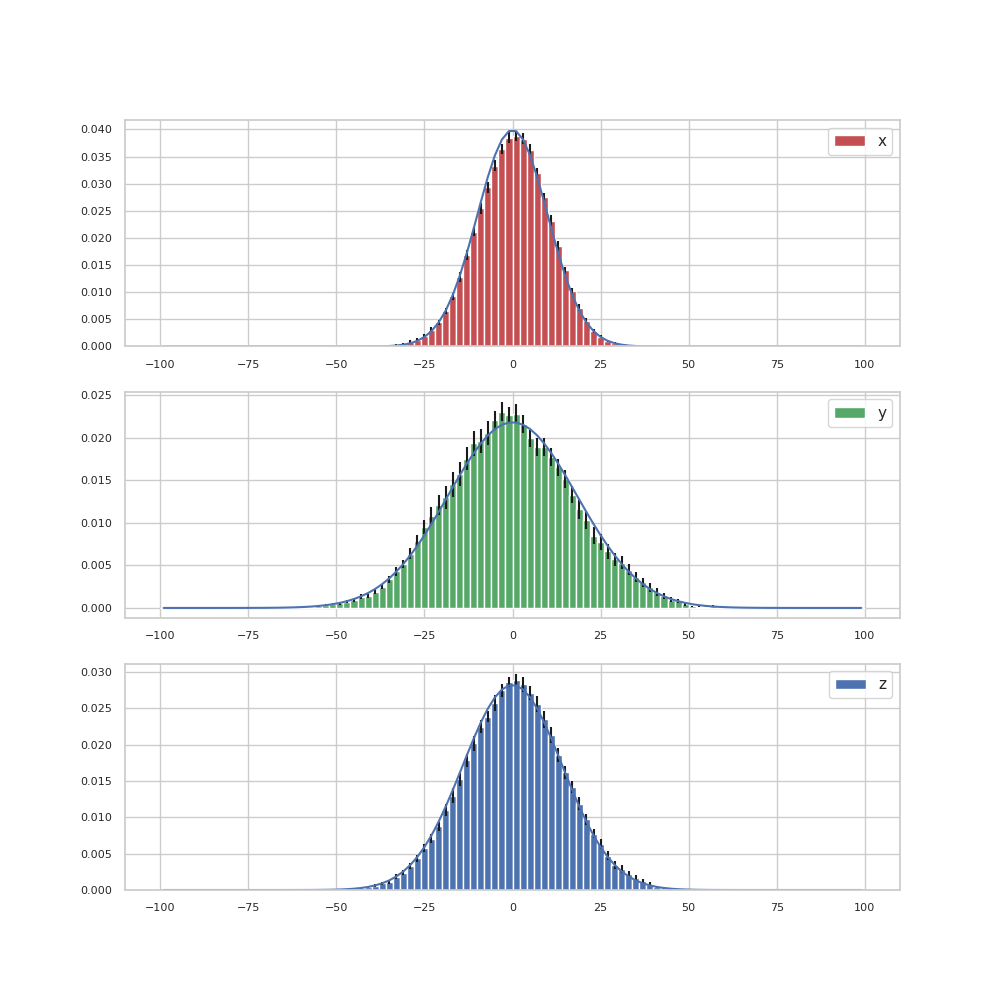

<IPython.core.display.Javascript object>


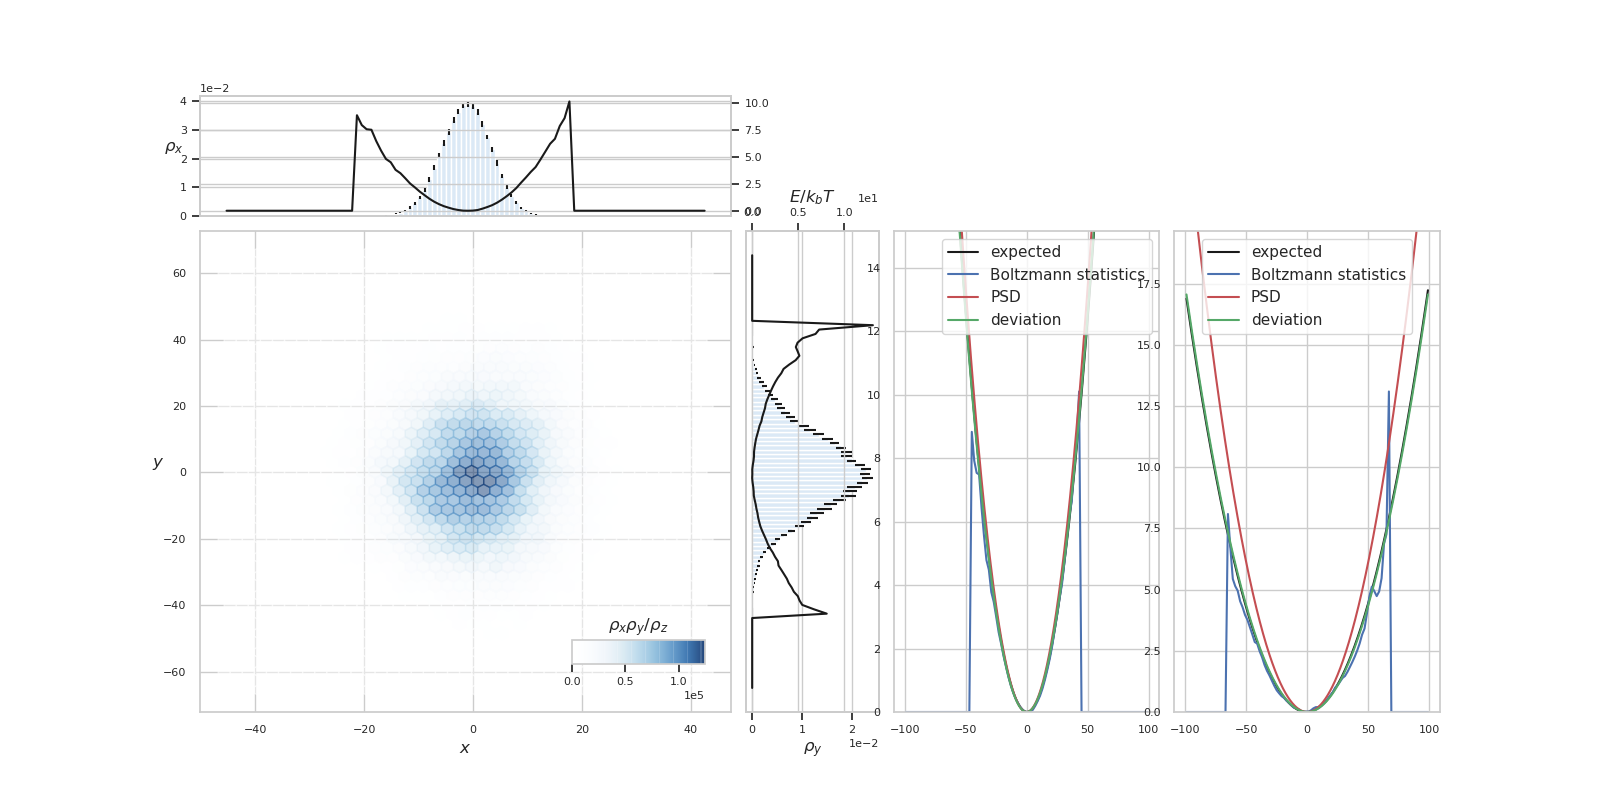

<ipython-input-11-2e1f3df4c1f6>:133: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  print(sum(mean_density[:,0]*(bins[1,0]-bins[0,0])))


1.0


In [11]:
sys.path.append("Calibration/potential_analysis")  # add folder with calibration scripts

P = 100

import potential_analysis as pa  # import the potential analysis script
mean_density, variance, bins, par_estimate, par_var = pa.main(data, P, gama, diff, w)

print("k_x =", par_estimate[0,0], ", err =", par_var[0,0])
print("x_eq =", par_estimate[1,0], ", err =", par_var[1,0] )
print("x offset =", par_estimate[2,0], ", err =", par_var[2,0])

print("k_y =", par_estimate[0,1], ", err =", par_var[0,1])
print("y_eq =", par_estimate[1,1], ", err =", par_var[1,1])
print("y offset =", par_estimate[2,1], ", err =", par_var[2,1])

print("k_z =", par_estimate[0,2], ", err =", par_var[0,2])
print("z_eq =", par_estimate[1,2], ", err =", par_var[1,2])
print("z offset =", par_estimate[2,2], ", err =", par_var[2,2])

import matplotlib.pyplot as plt
def normal(x, k, gama, diff):
    return np.sqrt(k/(2.*gama * diff * np.pi)) * np.exp(-k * (x**2)/(2.*gama * diff))

x_axis = np.linspace(np.min(bins), np.max(bins), 100)
y_axis = np.linspace(np.min(bins), np.max(bins), 100)
z_axis = np.linspace(np.min(bins), np.max(bins), 100)

dx_axis = x_axis[1]- x_axis[0]
dy_axis = y_axis[1]- y_axis[0]
dz_axis = z_axis[1]- z_axis[0]

fig1, (axs1, axs2, axs3) = subplots(3, figsize=(10,10))
axs1.plot(x_axis, normal(x_axis, k[0],gama,diff), color = "b")
axs1.bar(bins[:, 0], mean_density[:, 0], yerr = np.sqrt(variance[:,0]), width=(bins[1,0]-bins[0,0]), label = "x", color="r")
axs1.legend()
axs2.plot(y_axis, normal(y_axis, k[1],gama,diff), color = "b")
axs2.bar(bins[:, 1], mean_density[:, 1], yerr = np.sqrt(variance[:,1]), width=(bins[1,1]-bins[0,1]), label = "y", color="g")
axs2.legend()
axs3.plot(z_axis, normal(z_axis, k[2],gama,diff), color = "b")
axs3.bar(bins[:, 2], mean_density[:, 2], yerr = np.sqrt(variance[:,2]), width=(bins[1,2]-bins[0,2]), label = "z", color="b")
axs3.legend()

import seaborn as sns
sns.axes_style("darkgrid")
sns.set_palette("Blues")
fig = figure(27, figsize=(16,8))

gs = fig.add_gridspec(2,4,height_ratios = [0.25,1], width_ratios= [1,0.25,0.5,0.5], hspace=0.05, wspace=0.05)

#gs = fig.add_gridspec(2,2,height_ratios = [0.25,1], width_ratios= [1,0.25,], hspace=0.05, wspace=0.05)


axs1 = fig.add_subplot(gs[1,0])

from matplotlib.colors import ListedColormap
cmap = cm.Blues
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
BG = np.asarray([1., 1., 1.,])
for i in range(cmap.N):
    my_cmap[i,:-1] = my_cmap[i,:-1] * alphas[i] + BG * (1.-alphas[i])
my_cmap = ListedColormap(my_cmap)
asd = axs1.hexbin(data[:, :, 0],data[:,:,1], cmap = my_cmap, gridsize=40,alpha=0.5)

axs1.set_xlabel(r"$x$")
axs1.set_ylabel(r"$y$", rotation=0)
#axs1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
#axs1.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

axs1 = axs1.inset_axes([0.7,0.1,0.25,0.05])
cbar = fig.colorbar(asd, cax=axs1, orientation="horizontal")
axs1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
#axs1.yaxis.tick_left()
cbar.ax.set_title(r'$\rho_x \rho_y / \rho_z$')

axs2 = fig.add_subplot(gs[0,0])
axs2.bar(bins[:, 0], mean_density[:, 0], yerr = np.sqrt(variance[:,0]), width=(bins[1,0]-bins[0,0]), align="center")
axs2.set_xticks([])
axs2.set_ylabel(r"$\rho_x$", rotation=0)
axs2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

p_field = np.zeros(bins.shape[0])
p_field[np.where(mean_density[:,0]!=0.)[0]] = -np.log(mean_density[np.where(mean_density[:,0]!=0.)[0],0]/(np.max(mean_density[:,0])))
axs2_1 = axs2.twinx()  # instantiate a second axes that shares the same x-axis
axs2_1.plot(bins[:,0], p_field, "-k")
axs2_1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
#axs2_1.set_ylabel(r"$E/k_b T$", rotation=0)


#print(bins.shape)

axs3 = fig.add_subplot(gs[1,1])
axs3.barh(bins[::1, 1], mean_density[:, 1], height = (bins[1,1]-bins[0,1]), xerr = np.sqrt(variance[:,1]), align="center")#, label = "y", color="g")
axs3.set_yticks([])
axs3.xaxis.tick_top()
axs3.set_xlabel(r"$\rho_y$")
#axs3.xaxis.set_label_position('top') 
axs3.ticklabel_format(style='sci',scilimits=(-3,4),axis='both')
axs3.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

p_field = np.zeros(bins.shape[0])
p_field[np.where(mean_density[:,1]!=0.)[0]] = -np.log(mean_density[np.where(mean_density[:,1]!=0.)[0],1]/(np.max(mean_density[:,1])))
axs3_1 = axs3.twiny()  # instantiate a second axes that shares the same y-axis
axs3_1.plot(p_field, bins[:,1], "-k")
#axs3_1.plot(bins[:,1], -np.log(mean_density[:,1]), "-k")
axs3_1.set_xlabel(r"$E/k_b T$", rotation=0)
axs3_1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

x = np.linspace(np.min(bins[:,0]), np.max(bins[:,0]), 1000)
axs4 = fig.add_subplot(gs[1,2])
axs4.plot(x, 0.5*k_estimate[0]*(x-x_eq[0])**2 /(gama*diff), "-k", label="expected")
p_field = np.zeros(bins.shape[0])
p_field[np.where(mean_density[:,0]!=0.)[0]] = -np.log(mean_density[np.where(mean_density[:,0]!=0.)[0],0]/(np.max(mean_density[:,0])))
axs4.plot(bins[:,0], p_field, "b", label="Boltzmann statistics")
axs4.plot(x, 0.5*p[1,0]*2*pi*gama*(x**2)/(gama*diff), "r", label="PSD")
axs4.plot(x, 0.5*k_estimate[0]*(x**2)/(gama*diff), "g", label="deviation")


ylim(0, np.max(p_field) + np.max(p_field)*0.5)
axs4.legend()

x = np.linspace(np.min(bins[:,1]), np.max(bins[:,1]), 1000)
axs5 = fig.add_subplot(gs[1,3])
axs5.plot(x, 0.5*k_estimate[1]*(x-x_eq[1])**2 /(gama*diff), "-k", label="expected")
p_field = np.zeros(bins.shape[0])
p_field[np.where(mean_density[:,1]!=0.)[0]] = -np.log(mean_density[np.where(mean_density[:,1]!=0.)[0],1]/(np.max(mean_density[:,1])))
axs5.plot(bins[:,1], p_field, "b", label="Boltzmann statistics")
axs5.plot(x, 0.5*p[1,1]*2*pi*gama*(x**2) /(gama*diff), "r", label="PSD")
ylim(0, np.max(p_field) + np.max(p_field)*0.5)
axs5.plot(x, 0.5*k_estimate[1]*(x**2)/(gama*diff), "g", label="deviation")
axs5.legend()

print(sum(mean_density[:,0]*(bins[1,0]-bins[0,0])))

savefig("./full img.png")

In [11]:
for i in range(2):
    print(i)

0
1


In [ ]:
a = np.arange(1,101,1)

print(a[-int(2* 100/100)::])